In [2]:
import pandas as pd

df = pd.read_csv (r'2020_US_County_Level_Presidential_Results.csv')
df['percent_votes'] = 0
print (df)


     state_name  county_fips        county_name  votes_gop  votes_dem  \
0       Alabama         1001     Autauga County      19838       7503   
1       Alabama         1003     Baldwin County      83544      24578   
2       Alabama         1005     Barbour County       5622       4816   
3       Alabama         1007        Bibb County       7525       1986   
4       Alabama         1009      Blount County      24711       2640   
...         ...          ...                ...        ...        ...   
3147    Wyoming        56037  Sweetwater County      12229       3823   
3148    Wyoming        56039       Teton County       4341       9848   
3149    Wyoming        56041       Uinta County       7496       1591   
3150    Wyoming        56043    Washakie County       3245        651   
3151    Wyoming        56045      Weston County       3107        360   

      total_votes   diff   per_gop   per_dem  per_point_diff  percent_votes  
0           27770  12335  0.714368  0.270184 

Here we have all of the 2020 election data extracted from a csv that we found on github. The github user scraped data from results published by from Fox News, Politico, and the New York Times. The github user's name is tonmcg.

First, we will analyze which counties have the most votes for each state and display these results in a pie chart. The states we are looking at are the ones that flipped between the 2016 and 2020 general elections: Arizona, Michigan, Georgia, Pennsylvania, and Wisconsin

In [44]:
# states that we are looking at: Arizona, Georgia, Pennsylvania, Michigan, Wisconsin
MICHIGAN = 0
ARIZONA = 1
GEORGIA = 2
PENNSYLVANIA = 3
WISCONSIN = 4

state = ['Michigan', 'Arizona', 'Georgia', 'Pennsylvania', 'Wisconsin']

battlegroundStates = []
for i in range(0,5):
    battlegroundStates.append(df.loc[df['state_name']==state[i]])
    print(battlegroundStates[i])


     state_name  county_fips       county_name  votes_gop  votes_dem  \
1241   Michigan        26001     Alcona County       4848       2142   
1242   Michigan        26003      Alger County       3014       2053   
1243   Michigan        26005    Allegan County      41392      24449   
1244   Michigan        26007     Alpena County      10686       6000   
1245   Michigan        26009     Antrim County       9748       5960   
...         ...          ...               ...        ...        ...   
1319   Michigan        26157    Tuscola County      20297       8712   
1320   Michigan        26159  Van Buren County      21591      16803   
1321   Michigan        26161  Washtenaw County      56241     157136   
1322   Michigan        26163      Wayne County     264553     597170   
1323   Michigan        26165    Wexford County      12102       5838   

      total_votes    diff   per_gop   per_dem  per_point_diff  percent_votes  
1241         7064    2706  0.686297  0.303228        0.3

In [45]:
for curr in battlegroundStates:
    total_votes_in_state = curr['total_votes'].sum()
    print(total_votes_in_state)
    curr.loc[:,'percent_votes']=curr.loc[:,'total_votes']/total_votes_in_state


5539302
     state_name  county_fips       county_name  votes_gop  votes_dem  \
1241   Michigan        26001     Alcona County       4848       2142   
1242   Michigan        26003      Alger County       3014       2053   
1243   Michigan        26005    Allegan County      41392      24449   
1244   Michigan        26007     Alpena County      10686       6000   
1245   Michigan        26009     Antrim County       9748       5960   
...         ...          ...               ...        ...        ...   
1319   Michigan        26157    Tuscola County      20297       8712   
1320   Michigan        26159  Van Buren County      21591      16803   
1321   Michigan        26161  Washtenaw County      56241     157136   
1322   Michigan        26163      Wayne County     264553     597170   
1323   Michigan        26165    Wexford County      12102       5838   

      total_votes    diff   per_gop   per_dem  per_point_diff  percent_votes  
1241         7064    2706  0.686297  0.303228   

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

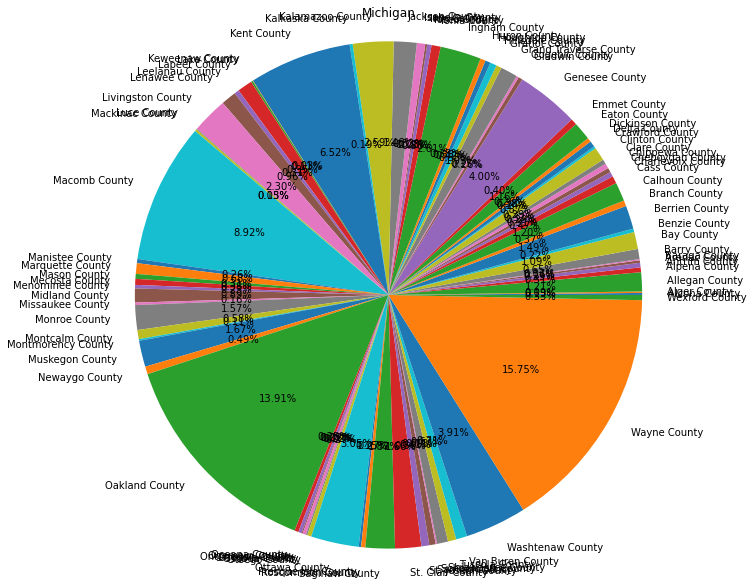

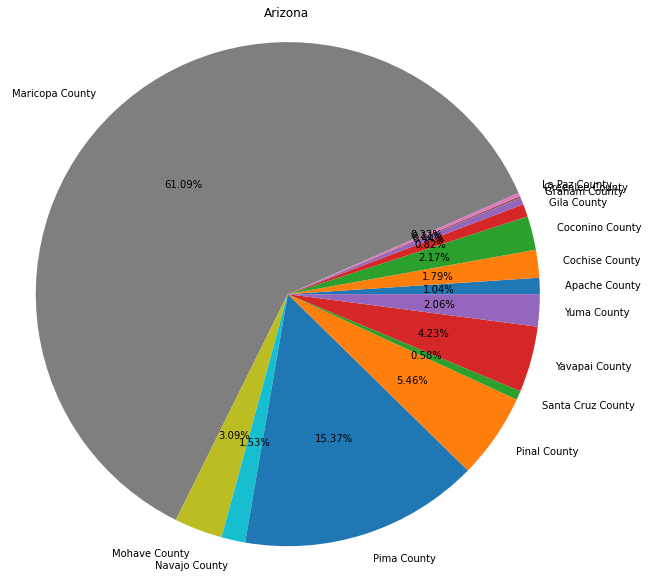

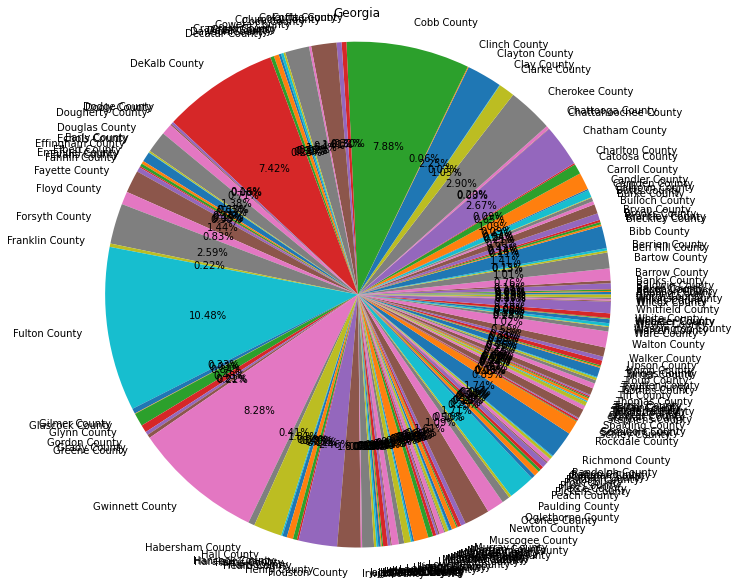

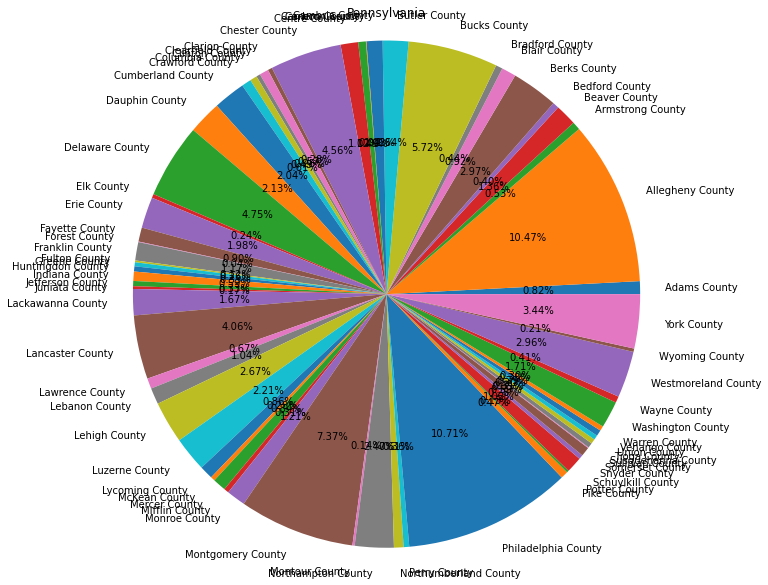

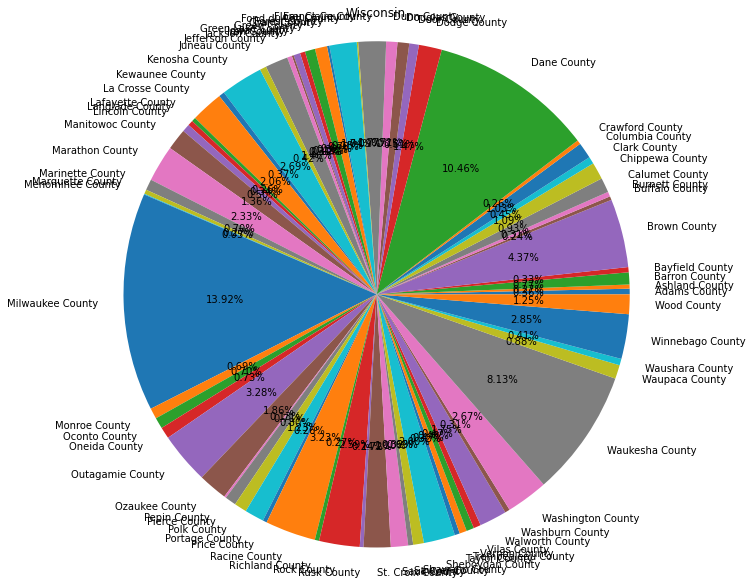

In [60]:
import matplotlib.pyplot as plt

i = 0
for curr in battlegroundStates:
    plt.figure(figsize=(10, 10))
    plt.pie(curr['total_votes'], labels=curr['county_name'], autopct='%1.2f%%', radius=1000.0)
    plt.title(state[i])
    plt.axis('equal')
    plt.show()
    i = i+1


In [8]:
arizonaPop = pd.read_csv (r'../changeInPop/arizona.csv')

0     6,941,072
1        71,381
2       125,686
3       140,407
4        53,356
5        37,807
6         9,643
7        20,648
8     4,256,143
9       205,412
10      108,467
11    1,016,707
12      417,193
13       46,400
14      224,575
15      207,247
Name: 2016, dtype: object


In [2]:
!pip install geopandas

In [3]:
!pip install shapely

In [4]:
import geopandas as gpd

In [5]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
%matplotlib inline

In [7]:
!pip install plotly
import plotly.figure_factory as ff

In [8]:
fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [9]:
!pip install plotly-geo

In [15]:
fips = ['06021']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [16]:
!pip3 install plotly

In [17]:
!pip3 install geopandas

In [18]:
!pip3 install plotly-geo

In [ ]:
!conda install plotly

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py38h578d9bd_0         143 KB  conda-forge
    openssl-1.1.1i             |       h7f98852_0         2.1 MB  conda-forge
    plotly-4.14.1              |     pyhd3deb0d_0         5.9 MB  conda-forge
    retrying-1.3.3             |             py_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.3 MB

The following NEW packages will be INSTALLE

In [1]:
!pip install --upgrade plotly
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely

Requirement already up-to-date: plotly in /opt/conda/lib/python3.8/site-packages (4.14.1)
Requirement already up-to-date: geopandas in /opt/conda/lib/python3.8/site-packages (0.8.1)
     |████████████████████████████████| 217 kB 3.9 MB/s eta 0:00:01
  Created wheel for pyshp: filename=pyshp-2.1.2-py3-none-any.whl size=36216 sha256=727120b86fbefab1d6542b5a12c50ba6bc869fcba4ce4e84c04f68f6c9371a2b
  Stored in directory: /home/jovyan/.cache/pip/wheels/49/29/69/6b6a800e28c596146549d22f4e1013abfcbb466cd179e586d3
Successfully built pyshp
Requirement already up-to-date: shapely in /opt/conda/lib/python3.8/site-packages (1.7.1)


In [1]:
import plotly.figure_factory as ff
fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [4]:

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'Florida']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()